# Fetching observations from Havvarsel Frost (havvarsel-frost.met.no) and Frost (frost.met.no) 

This notebook constructs a dataset containing oceanographic observations from havvarsel frost accomplished with neighboring atmospheric observations from frost

Havvarsel frost serves so far `temperature` measurements originated from badevann.no at seven beaches in the south of Norway. 
> Documentation:
> API documentation for obs/badevann http://havvarsel-frost.met.no/docs/apiref#/obs%2Fbadevann/obsBadevannGet 
> Datastructure described on http://havvarsel-frost.met.no/docs/dataset_badevann

From the frost server we retrieve observations from the `n` closest weather observation stations and include the values 
- `air_temperature`
TODO: 
- `wind_speed`
- `relative_humidity`
- `cloud_area_fraction` (which takes values from 0 = no clouds to 8 = fully clouded) 
- `sum(duration_of_sunshinePT1H)`
- `mean(surface_downwelling_shortwave_flux_in_air PT1H)`
- ...

> Documentation:
> API documentation for observations on https://frost.met.no/api.html#!/observations/observations 
> Available elements (params) are listed on https://frost.met.no/elementtable 
> Examples on Frost data manipulation with Python on https://frost.met.no/python_example.html
>
> See also:
> Complete documentation at https://frost.met.no/howto.html 
> Complete API reference at https://frost.met.no/api.html 


TODO:
 - Tune processing and storing of observational data sets (to suite whatever code that will use the data sets)
 - Prototype simple linear regression
 - Prototype simple ANN (with Tensorflow and Keras?)
 - ...
"""

In [1]:
# Importing general libraries
import sys
import json
import datetime
import requests
from traceback import format_exc
import pandas as pd
import matplotlib.pyplot as plt
import numpy 

# Importing user defined functionalities
import FrostImporter


## Data from Havvarsel-Frost

The dataset construction relies on the selection of an observation site from the badevann dataset (`id` = 0....6, see badevann.no for further information) and the selection of a time range with `start_time` and `end_time`

In [2]:
# Inputs
station_id     = "5"

start_time     = "2019-01-01T00:00"
end_time       = "2019-12-31T23:59"

FrostImporter = FrostImporter.FrostImporter(start_time=start_time, end_time=end_time)



In [3]:
# Fetching data
location, data = FrostImporter.havvarsel_frost(station_id)


Trying http://havvarsel-frost.met.no/api/v1/obs/badevann/get?time=2019-01-01T00%3A00%3A00Z%2F2019-12-31T23%3A59%3A00Z&incobs=true&buoyids=5&parameters=temperature
{'id': {'buoyID': '5', 'parameter': 'temperature'}, 'extra': {'source': 'badevann.no', 'name': 'Helleneset', 'pos': {'lon': '5.281', 'lat': '60.4355'}}}


## Data from Frost

The frost server requires a client-id which everyone can create for himself on https://frost.met.no/auth/requestCredentials.html


In [4]:
# Authentifiction id 
client_id = '3cf0c17c-9209-4504-910c-176366ad78ba' # for florian.beiser@sintef.no


In [5]:
# Identifying relavant stations
station_ids = FrostImporter.frost_location_ids(location, 5, client_id)

Trying https://frost.met.no/sources/v0.jsonld


In the following, we show an example how data from frost can be added to the existing dataset

TODO: Generalise the amendment of columns 

TODO: Add the variables from Frost which are mentioned in the headerr

In [6]:
# Load temperature
param = "air_temperature"

temperatures = FrostImporter.frost(station_ids[0],param)

Trying https://frost.met.no/observations/v0.jsonld?referencetime=2019-01-01T00%3A00%3A00Z%2F2019-12-31T23%3A59%3A00Z&sources=SN50570&elements=air_temperature


In [7]:
# Select suitable times from the timeseries and add it to data

data = FrostImporter.postprocess_frost(temperatures, "air_temp", data)

data.to_csv("dataset.csv")

0


In [9]:
print(data.head())


                           water_temp  air_temp0
time                                            
2019-06-11 10:00:00+00:00        13.7       14.9
2019-06-11 13:00:00+00:00        15.0       18.4
2019-06-11 16:00:00+00:00        15.2       20.0
2019-06-12 04:00:00+00:00        13.8       15.4
2019-06-12 07:00:00+00:00        14.0       15.7


[]

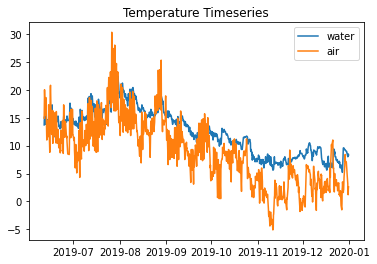

In [12]:
plt.plot(data["water_temp"], label="water")
plt.plot(data["air_temp0"], label="air")
plt.title("Temperature Timeseries")
plt.legend(loc="upper right")
plt.plot()